In [1]:
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from downsample import downsample
%matplotlib inline

In [2]:
def get_xyz_prediction(pred_json, camera_intrinsic, depth_map):
    lane_dicts = []

    with open(pred_json, 'r') as f:
        pred = json.load(f)
    for i, lane_dict in enumerate(pred[:]):
        score = lane_dict["score"]
        # if score < 0.15:
        #     continue
        
        kp_dict = lane_dict["keypoints"] 
        u = np.array(kp_dict[::3])
        v = np.array(kp_dict[1::3])
        # only keep those where u < 1920 and v < 1080
        for k in range(len(u)):
            if u[k] > 1920 or v[k] > 1080:
                u[k] = -1
                v[k] = -1
        u = u[u != -1]
        v = v[v != -1]
        # upsample the keypoint to 100 points
        # u, v = downsample(u, v, 100)
        # get z value from depth_map with u,v 
        # open depth map as numpy array
        np_depth_map = np.loadtxt(depth_map,delimiter=',')  
        z = np.array([np_depth_map[int(v[k]), int(u[k])] for k in range(len(u))])
        # project to 3d
        x = (u - camera_intrinsic[0][2]) * z / camera_intrinsic[0][0]
        y = (v - camera_intrinsic[1][2]) * z / camera_intrinsic[1][1]
        # update the keypoint dict
        lane_dicts.append([x, y, z])

    return lane_dicts

In [3]:
pred_2d = '/home/yiwang/CIVIL-459-Project/predictions/twice_downsampling-300epoch/val-jsons/demo_2'
gt_jsons = '/work/vita/datasets/OpenDriveLab___OpenLane/raw/lane3d_1000/training/segment-5592790652933523081_667_770_687_770_with_camera_labels/'
depths = '/home/yiwang/ZoeDepth/pred_depth/fine-tuned_for_demo/'
images = '/work/vita/datasets/OpenDriveLab___OpenLane/raw/images/training/segment-5592790652933523081_667_770_687_770_with_camera_labels/'

green = (0, 255, 0)
red = (0, 0, 255)

150793954017774200


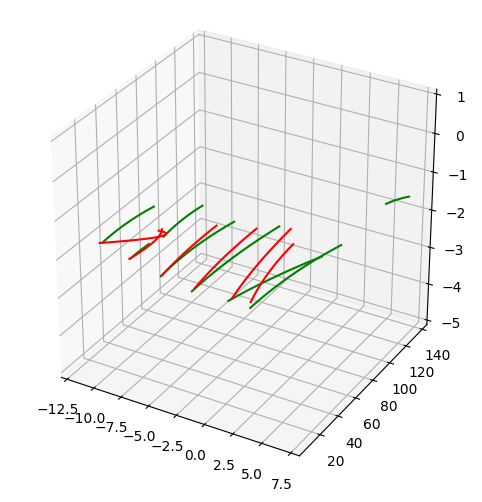

150793954327874800


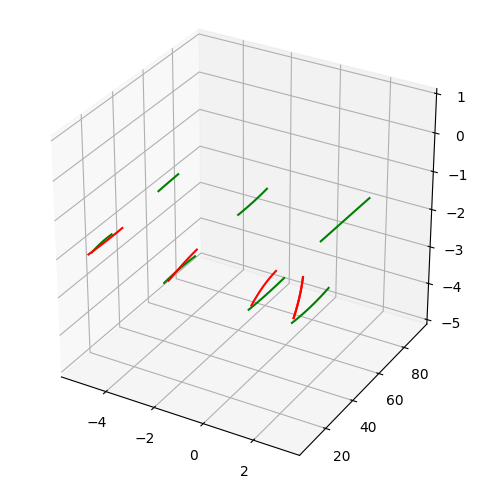

150793955930290100


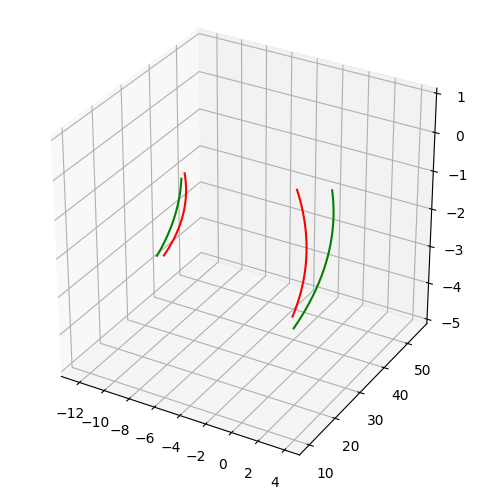

150793954597859900


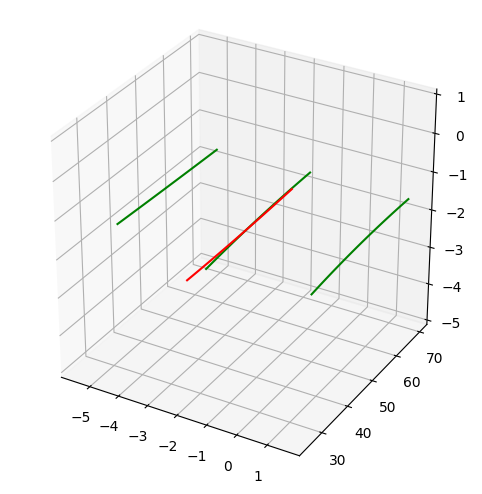

150793955190419800


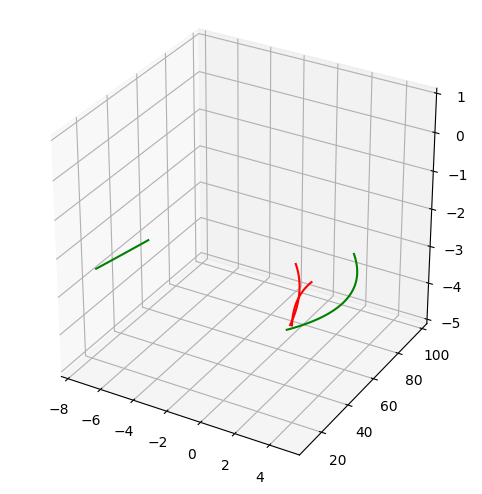

150793954527859500


/home/yiwang/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/yiwang/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3553: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


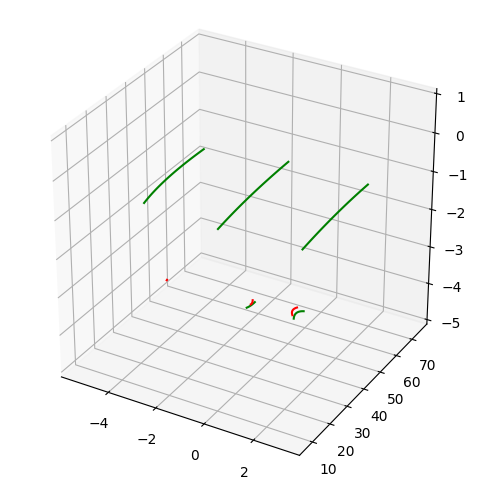

150793953987782300


KeyboardInterrupt: 

In [6]:
# iterate through images
for file in os.listdir(images):
    # get image base name
    img_name = file.split('.')[0]
    print(img_name)
    # load image
    img_path = os.path.join(images, file)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (1920,1280))
    blank_image = np.zeros_like(img)
    # get pred_2d path
    pred_2d_path = os.path.join(pred_2d, img_name+'.jpg.predictions.json')
    # get gt_jsons path
    gt_json_path = os.path.join(gt_jsons, img_name+'.json')
    # get depth path
    depth_path = os.path.join(depths, img_name+'.csv')
    
    with open(gt_json_path, 'r') as f:
        openlane_anno = json.load(f)
    with open(pred_2d_path, 'r') as f:
        openlane_pred = json.load(f)
        
    lane_pred = get_xyz_prediction(pred_2d_path, openlane_anno["intrinsic"], depth_path)
    # fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
    # new figure
    fig = plt.figure()
    #set figure size
    fig.set_size_inches(12, 6)
    ax = fig.add_subplot(111, projection='3d')
    # # process 2d pred image
    # for i, lane_dict in enumerate(openlane_anno["lane_lines"][:]):
        
    #     uv_dict = lane_dict["uv"]
        
    #     x = np.round(np.array(uv_dict[0])).astype(int)
    #     y = np.round(np.array(uv_dict[1])).astype(int)

    #     new_x, new_y = downsample(x, y, 24)
    #     new_x, new_y = downsample(new_x, new_y, 24)
    #     count = len(x)
    #     # for j, coordinates in enumerate(zip(new_x.astype(int), new_y.astype(int))):
    #     #     cv2.drawMarker(img, coordinates, color=green, markerType=cv2.MARKER_CROSS, thickness=2,
    #     #                     markerSize=12)

    #     polynomial_coefficients = np.polyfit(new_y, new_x, 7) # You can adjust the degree
    #     polynomial = np.poly1d(polynomial_coefficients)
    #     # Generate a range of y-values
    #     y_values = np.linspace(min(new_y), max(new_y), 100)
    #     # Calculate the corresponding x-values
    #     x_values = polynomial(y_values).astype(int)

    #     for j in range(len(y_values) - 1):
    #         start_point = (x_values[j], int(y_values[j]))
    #         end_point = (x_values[j + 1], int(y_values[j + 1]))
    #         cv2.line(img, start_point, end_point, green, 5) # Adjust color and thickness as needed
            
    # for i, lane_dict in enumerate(openlane_pred[:]):
            
    #     kp_dict = lane_dict["keypoints"]
        
    #     x = np.round(np.array(kp_dict[::3])).astype(int)
    #     y = np.round(np.array(kp_dict[1::3])).astype(int)
    #     x, y = downsample(x, y, 100)

        
    #     count = len(x)
    #     polynomial_coefficients = np.polyfit(y, x, 7) # You can adjust the degree
    #     polynomial = np.poly1d(polynomial_coefficients)
    #     # Generate a range of y-values
    #     y_values = np.linspace(min(y), max(y), 100)
    #     # Calculate the corresponding x-values
    #     x_values = polynomial(y_values).astype(int)

    #     for j in range(len(y_values) - 1):
    #         start_point = (x_values[j], int(y_values[j]))
    #         end_point = (x_values[j + 1], int(y_values[j + 1]))
    #         cv2.line(img, start_point, end_point, red, 5) # Adjust color and thickness as needed
    # # Plot the first image
    # # Use the first axis (ax1) for plotting
    # result = cv2.addWeighted(img, 1, blank_image, 0, 0)
    # plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    # plt.axis('off')
    
    # Plot the 3D graph
    # Use the second axis (ax2) for plotting
    # Set the projection to '3d'
    
    # ax2 = fig.add_subplot(122, projection='3d')
    
    
    for i, lane_dict in enumerate(openlane_anno["lane_lines"][:]):
        
        xyz_dict = lane_dict["xyz"]
        visibility = np.array(lane_dict["visibility"])
        
        x =  - np.array(xyz_dict[1])
        y = np.array(xyz_dict[0])
        # y =  np.zeros(len(x))
        z =  np.array(xyz_dict[2])
        # ax.scatter(x, y, z)
        # only keep those where visibility == 1
        x = x[visibility > 0]
        y = y[visibility > 0]
        z = z[visibility > 0]
        # close_mask = y < 70
        # x = x[close_mask]
        # y = y[close_mask]
        # z = z[close_mask]
        # if len(x) < 2:
        #     continue

        degree = 2 # You can adjust the degree of the polynomial
        coefficients_x = np.polyfit(y, x, degree)
        coefficients_z = np.polyfit(y, z, degree)

        # Create a polynomial function from the coefficients
        polynomial_x = np.poly1d(coefficients_x)
        polynomial_z = np.poly1d(coefficients_z)

        # Generate a range of y-values
        y_values = np.linspace(min(y), max(y), 100)

        # Calculate the corresponding x and z values
        x_values = polynomial_x(y_values)
        z_values = polynomial_z(y_values)
        
        # Plot the polynomial
        ax.plot(x_values, y_values, z_values, color="green")
        # set z limit
        ax.set_zlim(-5.0, 1.0)
        # turn off the ax2 2d axis
       
        # cast to x-y plane
        # ax.plot(x_values, y_values, np.zeros(len(x_values)), color="green")
    for j in range(len(lane_pred)):
        xyz_dict = lane_pred[j]
        x =    np.array(xyz_dict[0])
        y =    np.array(xyz_dict[2])
        z =  - np.array(xyz_dict[1])
        
        degree = 2  # You can adjust the degree of the polynomial
        coefficients_x = np.polyfit(y, x, degree)
        coefficients_z = np.polyfit(y, z, degree)

        # Create a polynomial function from the coefficients
        polynomial_x = np.poly1d(coefficients_x)
        polynomial_z = np.poly1d(coefficients_z)

        # Generate a range of y-values
        y_values = np.linspace(min(y), max(y), 100)

        # Calculate the corresponding x and z values
        x_values = polynomial_x(y_values)
        z_values = polynomial_z(y_values)
        # print(z_values)

        # Plot the polynomial
        ax.plot(x_values, y_values, z_values, color="red")
        ax.set_zlim(-5.0, 1.0)
        
        ax.set_box_aspect((1, 1, 1))
        

    # save the plt
    save_path = "./predictions/twice_downsampling-300epoch/demo_2_3d/"+img_name+".png"
    # check if the folder exists
    if not os.path.exists("./predictions/twice_downsampling-300epoch/demo_2_3d/"):
        os.makedirs("./predictions/twice_downsampling-300epoch/demo_2_3d/")
    plt.savefig(save_path,bbox_inches='tight',pad_inches=0)
    plt.show()


    
    
   
    